1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

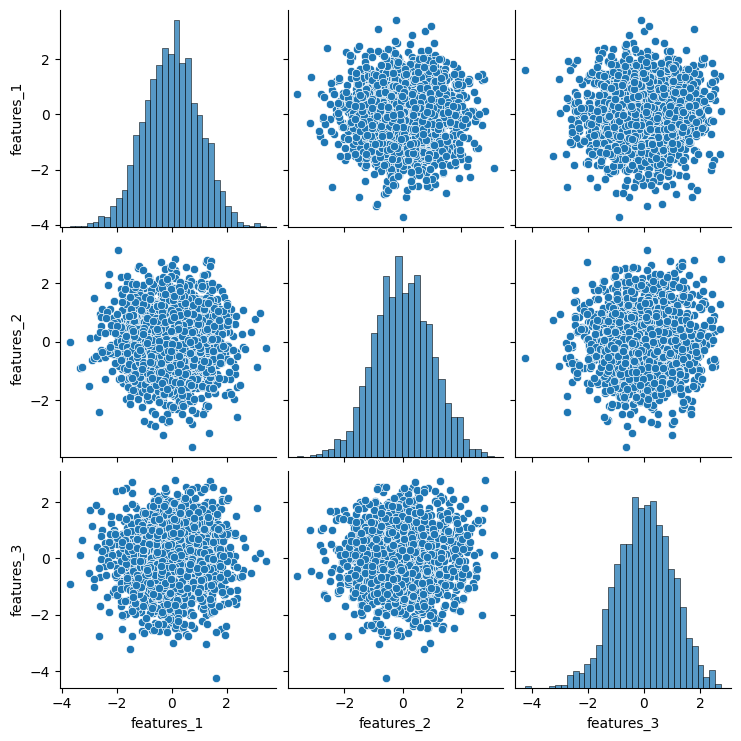

Correlation Matrix: 
             features_1  features_2  features_3
features_1     1.00000    -0.00522     0.02369
features_2    -0.00522     1.00000     0.04736
features_3     0.02369     0.04736     1.00000
it seems that there is no correlation between the features (numbers close to 0), only the diagonal got 1 (logical)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
from scipy.stats import norm
from scipy.integrate import trapz
df = pd.read_csv('data/regression_generated.csv')

sns.pairplot(df[['features_1', 'features_2', 'features_3']])
plt.show()

correlation_matrix = df[['features_1', 'features_2', 'features_3']].corr()
correlation_matrix.to_csv('correlation_matrix.csv')
print("Correlation Matrix:",'\n',correlation_matrix)

print("it seems that there is no correlation between the features (numbers close to 0), only the diagonal got 1 (logical)")


2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

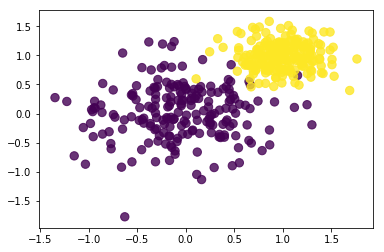

In [2]:
from IPython.display import Image
Image('data/two_categories_scatter_plot.png')

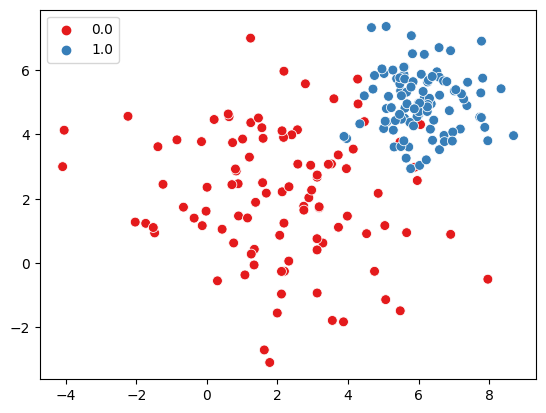

In [3]:
def generate_2d_dataset(num_points_per_category, mean1, std_dev1, mean2, std_dev2):
    category1 = np.random.normal([mean1[0], mean1[1]], [std_dev1[0], std_dev1[1]], size=(num_points_per_category, 2))
    category2 = np.random.normal([mean2[0], mean2[1]], [std_dev2[0], std_dev2[1]], size=(num_points_per_category, 2))
    dataset = np.concatenate([category1, category2])
    labels = np.concatenate([np.zeros(num_points_per_category), np.ones(num_points_per_category)])
    return dataset, labels

def plot_scatter_2d(dataset, labels):
    sns.scatterplot(x=dataset[:, 0], y=dataset[:, 1], hue=labels, palette="Set1", marker='o', s=50)
    plt.show()

dataset, labels = generate_2d_dataset(100, (2,2),(2,2),(6,5),(1,1))
plot_scatter_2d(dataset, labels)


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [34]:

pathfile = 'data/residuals_261.pkl'

pic = open(pathfile, 'rb')
pickle_data = pickle.load(pic)
print(pickle_data)

 
#I didn't find how to interact with pickles 


pic.close()





{'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}


4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


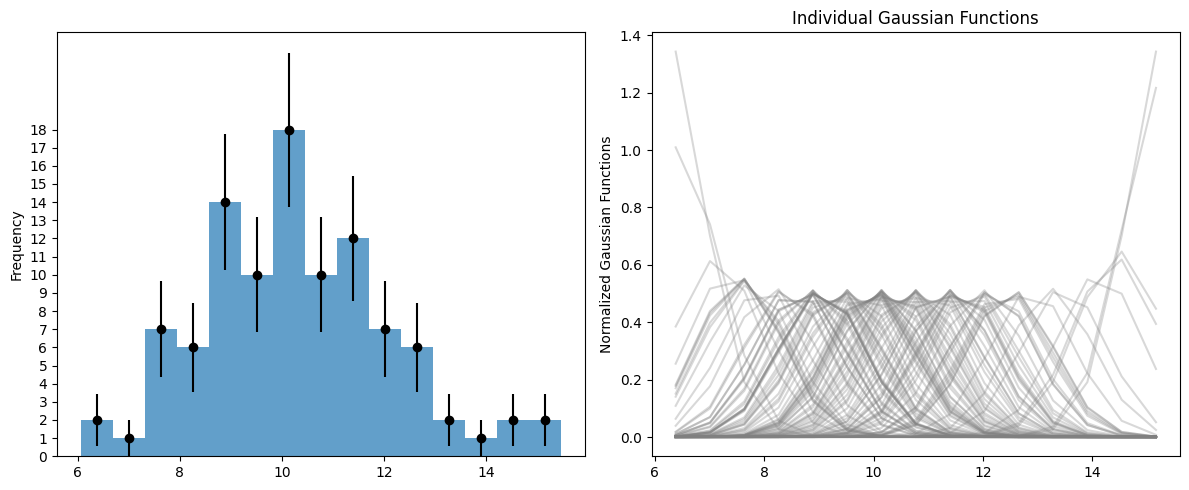

In [5]:
#array
N = 100
mean_value = 10
std_deviation = 2
x = np.random.normal(mean_value, std_deviation, N)

# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
counts, bins, _ = ax1.hist(x, bins=15, alpha=0.7, density=False)
bin_centers = (bins[:-1] + bins[1:]) / 2
poisson_errors = np.sqrt(counts)
ax1.errorbar(bin_centers, counts, yerr=poisson_errors, fmt='o', color='black')
ax1.set_ylabel('Frequency')
ax1.set_yticks(np.arange(0, max(counts) + 1, 1))

# gaussian functions
std_deviation_parameter = 1.06 * x.std() * (x.size)**(-1/5)

for xi in x:
    gaussian = norm.pdf(bin_centers, loc=xi, scale=std_deviation_parameter)
    if trapz(gaussian, bin_centers) != 0:
        gaussian /= trapz(gaussian, bin_centers)
        ax2.plot(bin_centers, gaussian, color='gray', alpha=0.3)

ax2.set_ylabel('Normalized Gaussian Functions')
ax2.set_title('Individual Gaussian Functions')

plt.tight_layout()
plt.show()
